In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris=datasets.load_iris()
X= iris["data"][:,(2,3)]
y=(iris["target"]==2).astype(np.float64)

svm_clf=Pipeline([("scaler",StandardScaler()),("linear_svc",LinearSVC(C=1, loss="hinge", random_state=42))])
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [ ]:
svm_clf.predict([[4.25,1.0]])

array([0.])

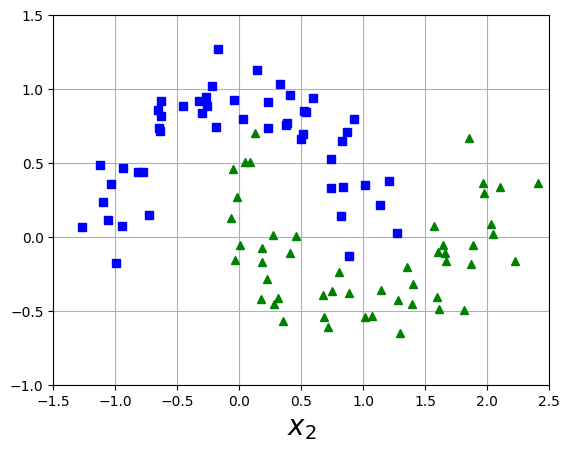

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X,y,axes):
  plt.plot(X[:, 0][y==0],X[:,1][y==0],"bs")
  plt.plot(X[:, 0][y==1],X[:,1][y==1],"g^")
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.xlabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn. preprocessing import StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

polynomial_svm_clf.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

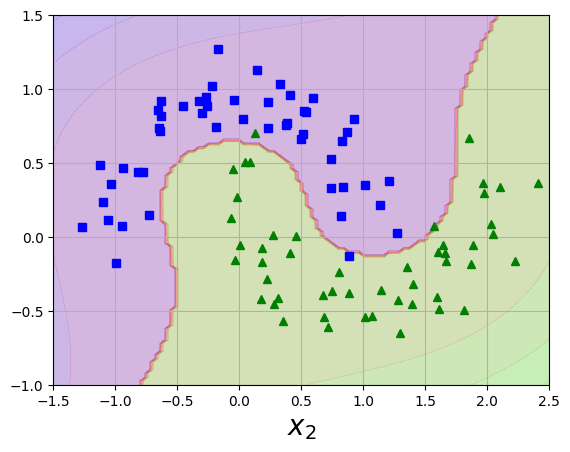

In [ ]:
import numpy as np

def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
  plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()

In [ ]:
from sklearn.svm import SVC

ploy_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
ploy_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [ ]:
ploy100_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
ploy100_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

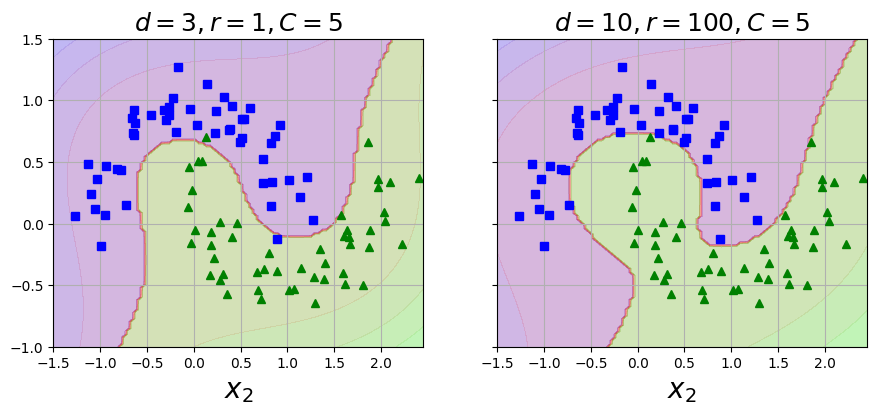

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(ploy_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$",fontsize=18)

plt.sca(axes[1])
plot_predictions(ploy100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$",fontsize=18)
plt.ylabel("")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

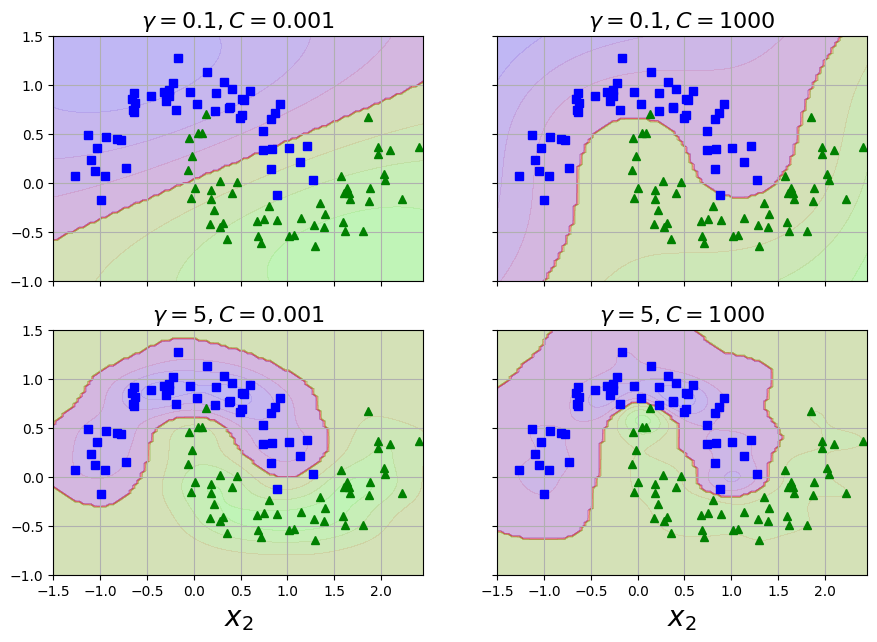

In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []

for gamma, C in hyperparams:
  rbf_kernel_svm_clf = Pipeline([
      ('scaler', StandardScaler()),
      ("svm_clf", SVC(kernel='rbf', gamma=gamma, C=C))
   ])
  rbf_kernel_svm_clf.fit(X,y)
  svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
  plt.sca(axes[i // 2, i%2])
  plot_predictions(svm_clf,[-1.5, 2.45, -1, 1.5])
  plot_dataset(X,y, [-1.5, 2.45, -1, 1.5])
  gamma, C =hyperparams[i]
  plt.title("$\gamma = {}, C={}$".format(gamma, C), fontsize=16)
  if i in (0, 1):
    plt.xlabel("")
  if i in (1, 3):
    plt.ylabel("")

plt.show

In [ ]:
#SVM Regression

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m,1)
y = (4 + 3 * X + np.random.rand(m,1)).ravel()

In [ ]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [ ]:
y

array([ 7.21682534, 10.47941866,  9.33146259,  8.48677826,  5.53401182,
        5.85784136,  4.43699418,  9.39303974,  7.65191736,  8.5737658 ,
        4.51218426, 10.09080814,  9.82339335,  5.63078799,  5.37188431,
        5.64312314,  5.96637768,  7.95073557,  6.66622076,  6.73426178,
        8.44336214,  5.03567885,  5.75839001,  7.01363249,  7.44327725,
        9.44006294,  5.96931304,  7.15945128,  7.91295314,  4.39457154,
        8.50837254,  5.64644287,  4.72120758,  9.75687157, 10.10477452,
        9.17556741,  6.55728879,  5.22359016,  8.9926109 ,  7.11312989,
        4.85182366,  7.68430625,  4.96711618, 10.01719961,  6.32364707,
        8.4689293 ,  6.39299929,  7.54794915,  7.3056808 ,  5.21701816])

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

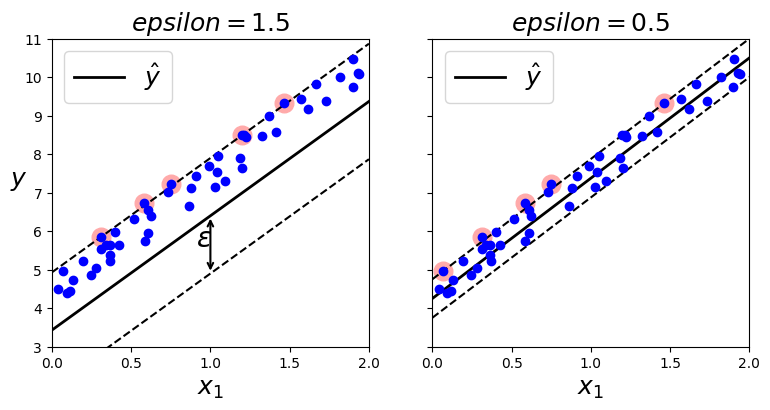

In [ ]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

def find_support_vector(svm_reg, X, y):
  y_pred = svm_reg.predict(X)
  off_margin = (np.abs(y-y_pred) >= svm_reg.epsilon)
  return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vector(svm_reg1,X,y)
svm_reg2.support_ = find_support_vector(svm_reg2,X,y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regression(svm_reg, X, y, axes):
  x1s = np.linspace(axes[0], axes[1], 100).reshape(100,1)
  y_pred= svm_reg.predict(x1s)
  plt.plot(x1s, y_pred, 'k-', linewidth=2,label=r"$\hat{y}$")
  plt.plot(x1s, y_pred + svm_reg.epsilon, 'k--')
  plt.plot(x1s, y_pred - svm_reg.epsilon, 'k--')
  plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
  plt.plot(X,y,"bo")
  plt.xlabel(r"$x_1$", fontsize=18)
  plt.legend(loc='upper left', fontsize=18)
  plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9,4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2,3,11])
plt.title(r"$epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.annotate(
    '', xy=(eps_x1, eps_y_pred), xycoords='data',
    xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
    textcoords='data', arrowprops={'arrowstyle':'<->', 'linewidth': 1.5}
  )

plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0,2,3,11])
plt.title(r"$epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

plt.show()

In [ ]:
# Decision Tree

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5,1.5]])

array([1])

In [ ]:
from sklearn.datasets import load_breast_cancer

wdbc=load_breast_cancer()
print(wdbc.DESCR)
print('특징 이름=',list(wdbc.feature_names))
print('부류 이름=',list(wdbc.target_names))

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
결정 트리의 정확률= 0.9824253075571178


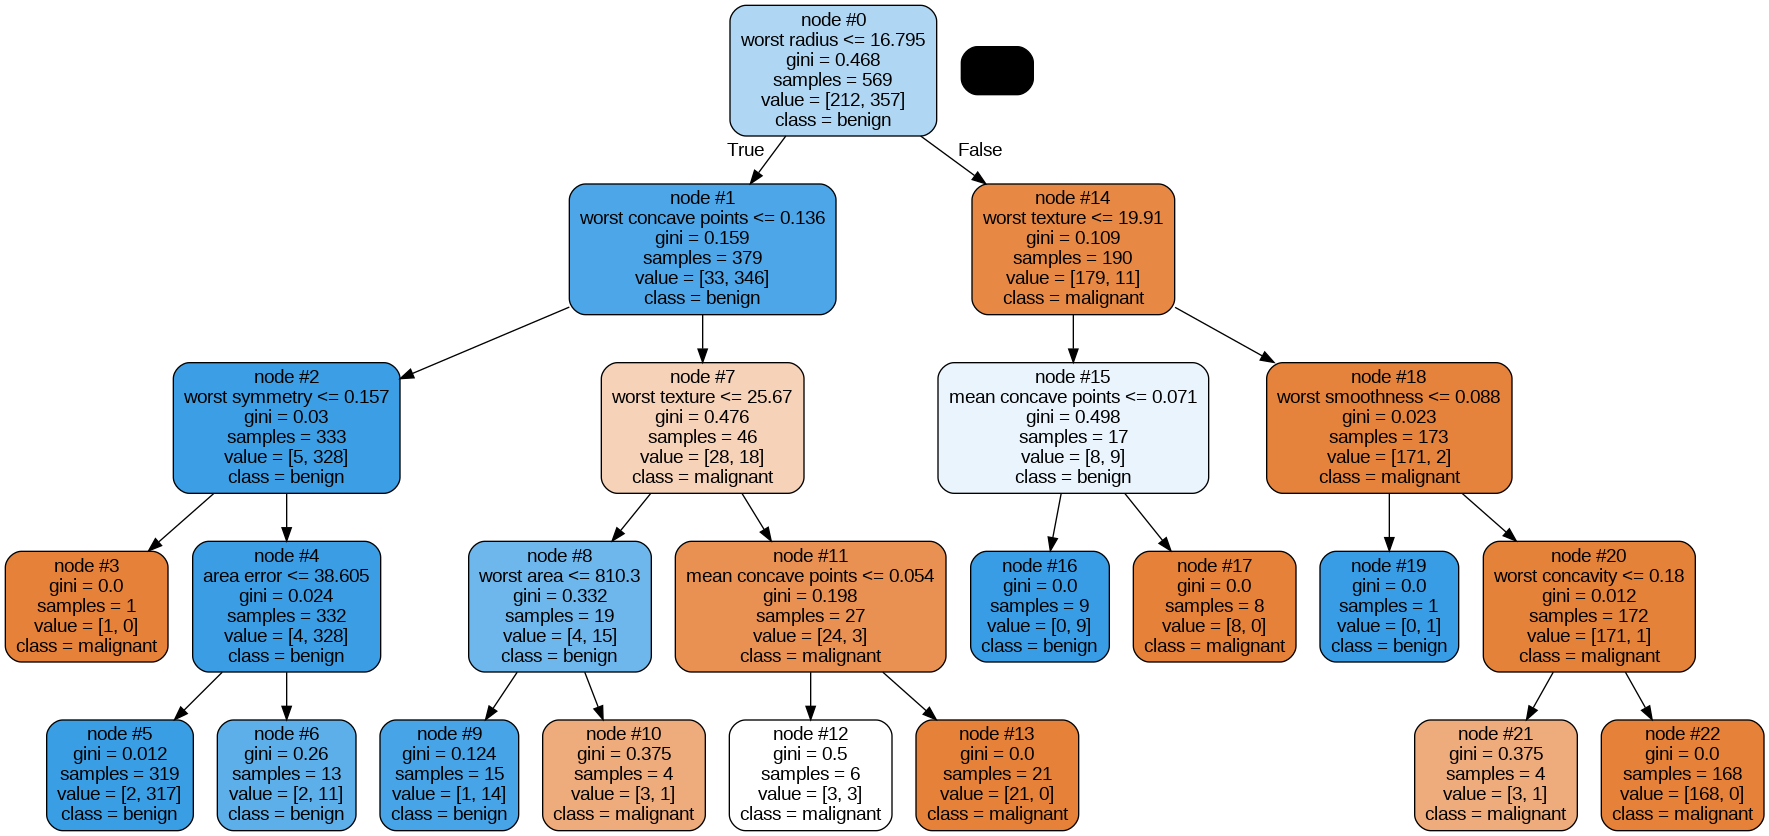

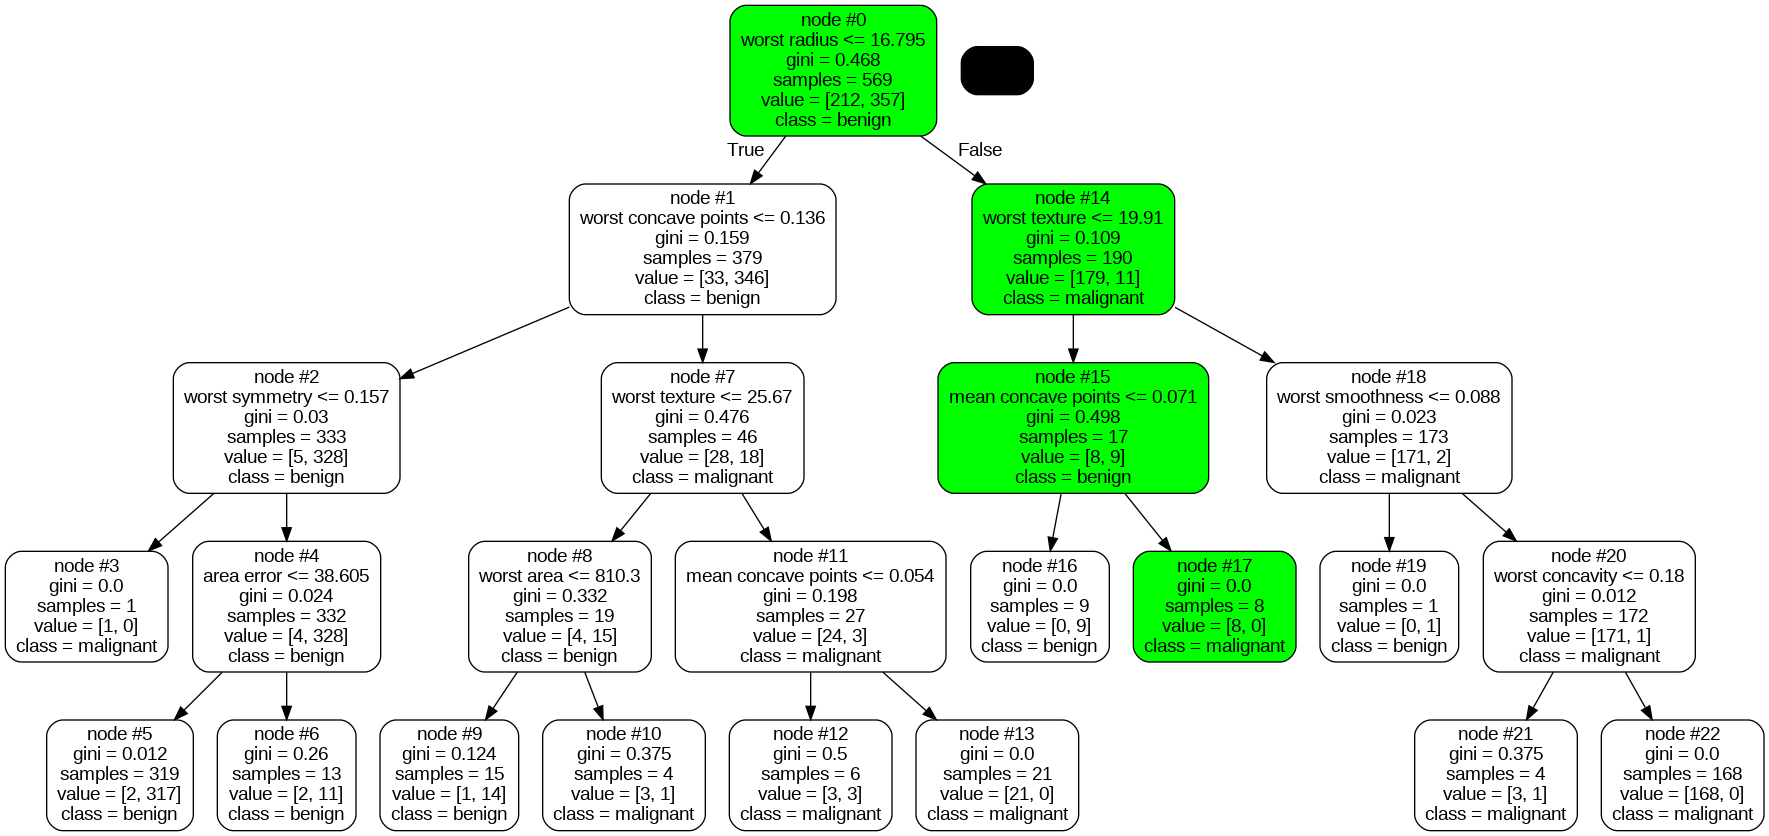

In [ ]:
!apt-get install graphviz
!pip install pydotplus

from sklearn.datasets import load_breast_cancer
from sklearn import tree
import pydotplus
from IPython.display import Image, display

wdbc = load_breast_cancer()

decision_tree = tree.DecisionTreeClassifier(max_depth=4, random_state=1)
dt = decision_tree.fit(wdbc.data, wdbc.target)  # 결정 트리 학습

res = dt.predict(wdbc.data)
print('결정 트리의 정확률=', sum(res == wdbc.target) / len(res))  # 예측

dot = tree.export_graphviz(dt, out_file=None, feature_names=wdbc.feature_names, class_names=wdbc.target_names, filled=True, node_ids=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot)

graph.write_png('tree.png')  # 결정 트리를 위한 그림 저장
display(Image('tree.png'))

x_test = wdbc.data[0:1]
path = dt.decision_path(x_test)
path_seq = path.toarray()[0]

for n, value in enumerate(path_seq):
    node = graph.get_node(str(n))[0]
    if value == 0:
        node.set_fillcolor('white')
    else:
        node.set_fillcolor('green')  # 의사결정 경로를 green 색으로 표시

graph.write_png('tree_with_path.png')  # 의사결정 경로를 포함한 그림 저장
display(Image('tree_with_path.png'))

In [ ]:
import numpy as np

# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

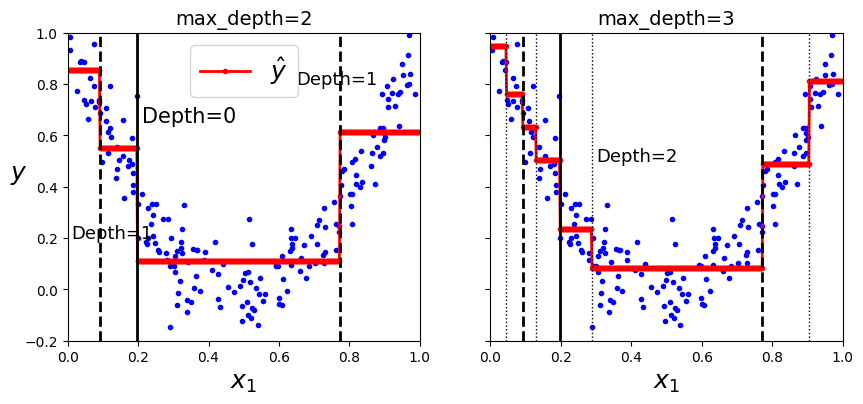

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib as mpl
import matplotlib.pyplot as plt

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

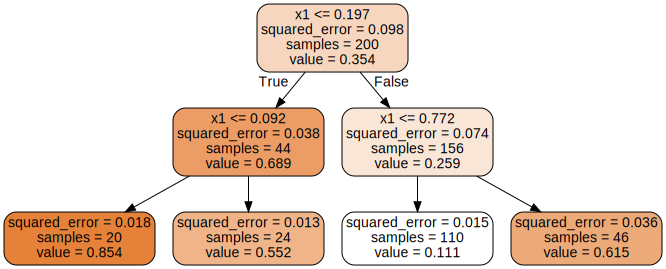

In [ ]:
import os
import graphviz
from graphviz import Source
from sklearn.tree import export_graphviz

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

export_graphviz(
        tree_reg1,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

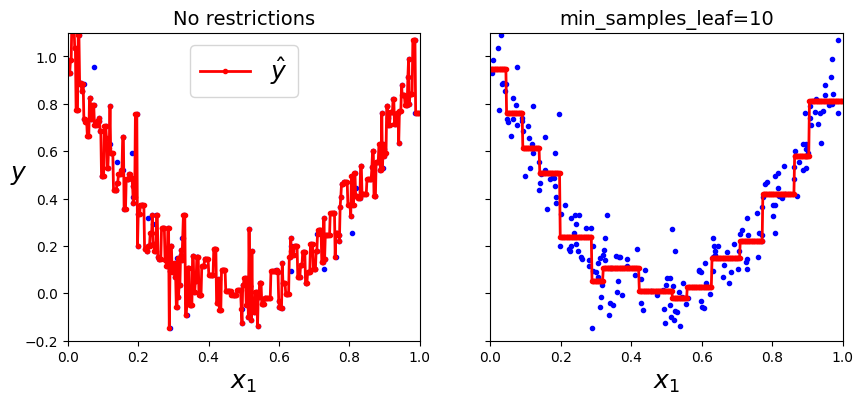

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

In [ ]:
# XGBOOST Fima Indian Diabetes Sets

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

# load data
dataset = loadtxt('/content/drive/MyDrive/CodeData/Code/GitHub_Examples/Lecture_XAI_XGBoost_FI_PDP_pima-indians-diabetes.csv', delimiter=',')
# split data into X and Y
X = dataset[:, 0:8]
y = dataset[:, 8]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# fit model into training-data
model = XGBClassifier()
model.fit(x_train, y_train)

# 예전모델
calculate_accuracy(model, x_test, y_test)

Accuracy: 74.03%


0.7402597402597403

In [ ]:
# https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster

model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    learning_rate=0.03,
    n_estimators=150,
    reg_alpha =0.15,
    reg_lambda=0.7,
    max_depth=4,
    subsample=1
)
model.fit(
    x_train, 
    y_train,
    eval_metric='map',
    verbose=True
)

print(model.evals_result)
calculate_accuracy(model, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


<bound method XGBModel.evals_result of XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)>
Accuracy: 84.42%


0.8441558441558441

In [ ]:
# pima indians diabetes
"""
# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1) -- diabetes
"""
names = [
    '# of preganant',
    'Glucose concentration',
    'Blood pressure',
    'Skin fold thinckness',
    '2-hour insulin',
    'BMI',
    'Diabetes pedigree',
    'Age',
    'Result'
]

In [ ]:
patient = {
    'Pregnancies': [1], 
    'Glucose': [161], 
    'BloodPressure': [72], 
    'SkinThickness': [35], 
    'Insulin': [0], 
    'BMI': [28.1], 
    'DiabetesPedigreeFunction': [0.527], 
    'Age': [20]
}
value_patient = [[1, 161, 72, 35, 0, 28.1, 0.527, 20]]

l = model.predict_proba(value_patient)
print('No diabetes: {:.2%}\n Yes diabetes: {:.2%}'.format(l[0][0], l[0][1]))

No diabetes: 51.25%
 Yes diabetes: 48.75%


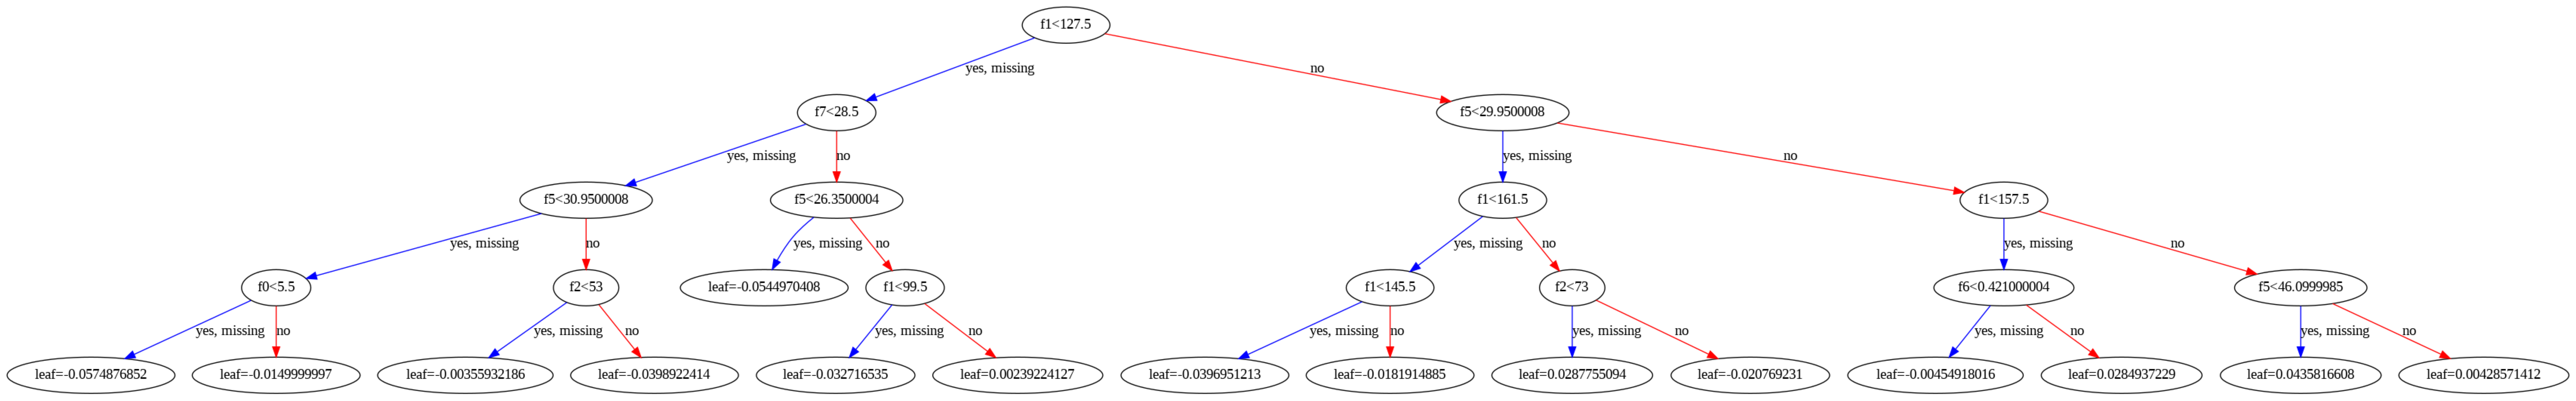

In [ ]:
%matplotlib inline
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import matplotlib.pyplot as plt

from xgboost import plot_tree
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 100,200

plot_tree(model)
plt.show()